# TIM - TP2: Histogram Manipulation

This session is dedicated to histograms! As you know, they are very useful tools in the context of image preprocessing.

The aim of this practical session is to develop some image preprocessing algorithms using image histograms.

## Ex. 1: Starting with the Basics...

This exercise will be quick, as it was covered in the last session.

First, import the necessary libraries for this session and define the path to your image database.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time
path_base = "/content/drive/MyDrive/Colab Notebooks/M1_DSAI_IAwAtSI_PW1/Base_images/Hawke_Bay.jpg"

Then import the grayscale image Hawke_Bay.jpg.

In [ ]:
hawke_bay = cv2.imread(path_base, 0)

Make sure your image is loaded in grayscale (i.e. with only 2 dimensions).

In [ ]:
assert hawke_bay.ndim==2,"Loaded image is not grayscale"
print("Everything is okay ;) ")

Everything is okay ;) 


## Ex 2 : Some useful functions for the future

In this section, we'll develop 3 functions that will be useful for the rest of the course

First of all, we're going to create a function whose purpose is to time another function. This will display the execution time of the function to be timed, and the result it has produced. We'll use the *time* package to define two variables *t_before* and *t_after*. Your procedure will take as input the function to be timed, the image to be processed for this function and the function name (string).

Example signature:
* time(function_to_time,image,function_name) => processed_image

In [ ]:
# To be completed
# Writing the timing function of a function
def timing_fn(function_to_time, image, function_name):
  t_before = time.time()
  processed_image = function_to_time(image)
  t_after = time.time()
  execution_time = t_after - t_before
  print(f"Function '{function_name}' executed in {execution_time:.6f} seconds.")
  return processed_image

Test your newly-developed function.

In [ ]:
import time

def test_fonction(image):
    time.sleep(1)
    return image

def test_fonction_2(image):
    time.sleep(2)
    return image

# To be completed
# Test of your function
timing_fn(test_fonction, hawke_bay, 'test_fonction')
timing_fn(test_fonction_2, hawke_bay, 'test_fonction_2')

Function 'test_fonction' executed in 1.001082 seconds.
Function 'test_fonction_2' executed in 2.002135 seconds.


array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

Create a procedure for displaying an image, taking as arguments the image, the color palette to be used and the image title (optional argument).

Signature example:
* display(image,palette,title)
* display(image,palette)

In [ ]:
# To be completed
# Write the image display function
def display(image, palette='viridis', title=None):
  plt.figure(figsize=(6, 6))
  plt.imshow(image, cmap=palette)
  if title:
    plt.title(title)
  plt.show()

Display the image in grayscale.

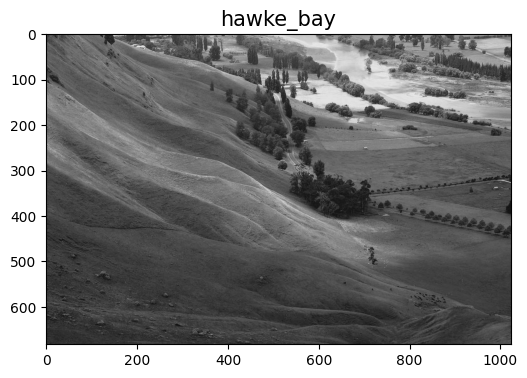

In [ ]:
# To be completed
# Display the image in grayscale
display(hawke_bay, 'gray', 'hawke_bay')

Above you have your image displayed in B&W. However, take a look at the image in your graphics folder. You should see a difference. But why is this?

By default, when **displaying a B&W image, Matplotlib's (Pyplot) imshow function normalizes the image values**. This means that whatever the image values, when displayed, the image will be modified so that the minimum is 0 and the maximum 255.

The problem here is that the image looks well contrasted, but it's not. To do this, we want to display the actual values of the B&W image, and spoiler : **WE'LL ALWAYS WANT TO DISPLAY ONLY THE REAL VALUES!

So modify your display function so that it displays the real values (hint: see the pyplot.imshow documentation).

In [ ]:
#### To be completed
# Write the image display function (ACTUAL VALUES ARE WANTED)
def display(image, palette='viridis', title=None):
  plt.figure(figsize=(6, 6))
  plt.imshow(image, cmap=palette, vmin=image.min(), vmax=image.max())
  if title:
    plt.title(title)
  plt.show()

Display the image in grayscale.

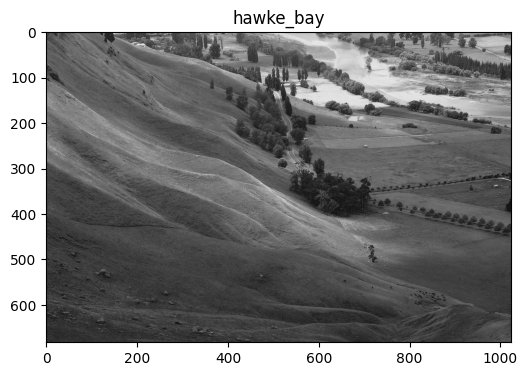

In [ ]:
# To be completed
# Display the image in grayscale
display(hawke_bay, 'gray', 'hawke_bay')

Now create a function to plot the grayscale histogram of an image. It will take as arguments the image and the histogram title (optional argument).

Example signatures :
* histogram(image,title)
* histogram(image)

In [ ]:
# To be completed
# Write the histogram display function for an image
def histogram(image, title=None):
  plt.figure(figsize=(8, 6))
  plt.hist(image.flatten(), bins=256, range=(0, 255))
  if title:
    plt.title(title)
  plt.show()

Draw the grayscale histogram of this image.

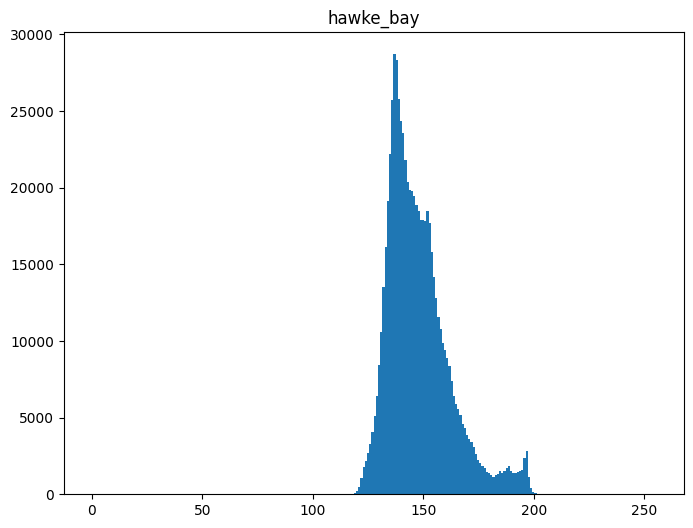

In [ ]:
# To be completed
# Display image grayscale histogram
histogram(hawke_bay, 'hawke_bay')

## Ex 3: Image binarization

The aim of image binarization is to assign a uniform level to the relevant pixels and eliminate the others. It's a fairly simple operation, but one that's used in so many concrete cases.

So we're going to implement it in 2 versions: binarization by thresholding and binarization by extracting an intensity window. There are other versions of binarization (inverted binarization, binarization with adaptive threshold, etc.).

**1.**

Let's start with binarization by thresholding. The principle is simple: for a defined threshold a, binarization is a transformation $t(f)$ where, for any pixel f in the image :
\begin{equation*}
t(f) =
\begin{cases}
0 & \quad \text{if } f<a\\
255 & \quad \text{otherwise}\\
\end{cases}
\end{equation*}

Write a function that will perform binarization by thresholding on the loaded image, with a defined threshold a.

In [ ]:
# To be completed
# Threshold definition
a = 150

In [ ]:
# To be completed
# Creation of the binarization function using thresholding
def binarize(image, threshold):
  return np.where(image < threshold, 0, 255).astype(np.uint8)

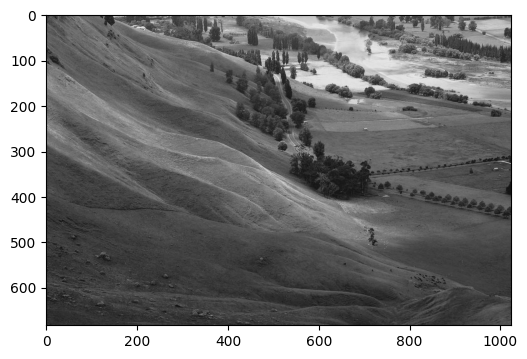

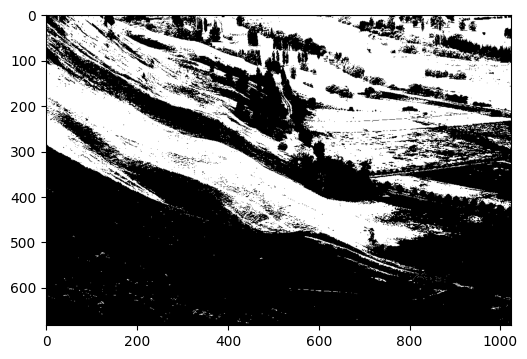

In [ ]:
# To be completed
# Display original image and result after
# binarization with threshold a
display(hawke_bay, 'gray')
display(binarize(hawke_bay, a), 'gray')

Plot the grayscale histogram of the original image and the image after binarization by thresholding.

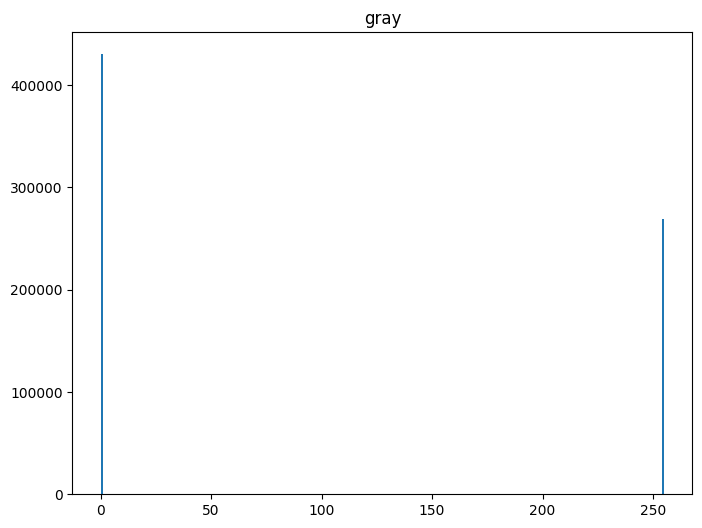

In [ ]:
# To be completed
# Display grayscale histogram of original image and binarized image
# binarized image with threshold a
histogram(binarize(hawke_bay, a), 'gray')

**2.**

Let's move on to binarization by intensity window extraction. The principle is similar to binarization by thresholding: for 2 thresholds a and defined, $a<b$, binarization is a transformation $t(f)$ where, for any pixel f in the image :
\begin{equation*}
    t(f) =
    \begin{cases}
    f & \quad \text{if } a\leq f \leq b\\
    0 & \quad \text{otherwise}\\
    \end{cases}
\end{equation*}

Write a function that performs binarization by extracting intensity windows from the loaded image, with thresholds a and b defined. Initially, this function will be developed with loops.

In [ ]:
# To be completed
# Definition of thresholds
a = 50
b = 150

In [ ]:
# To be completed
# Creation of the binarization function by extracting an intensity window
def binarize_with_intensity(image, threshold_min, threshold_max):
  return np.where((image >= threshold_min) & (image <= threshold_max), image, 0).astype(np.uint8)

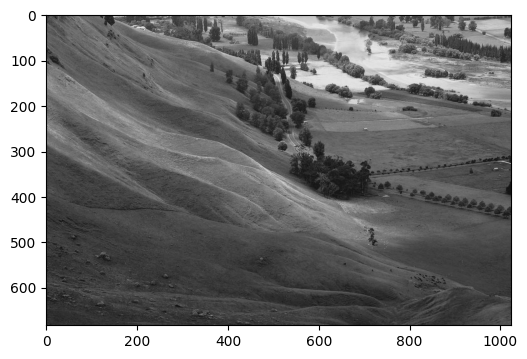

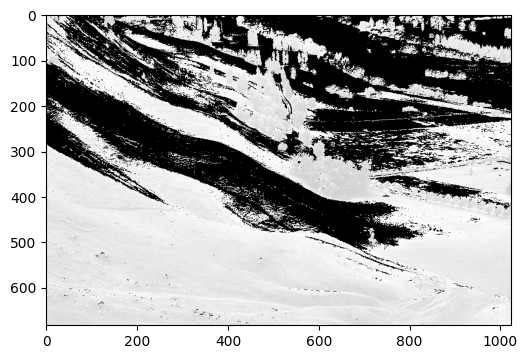

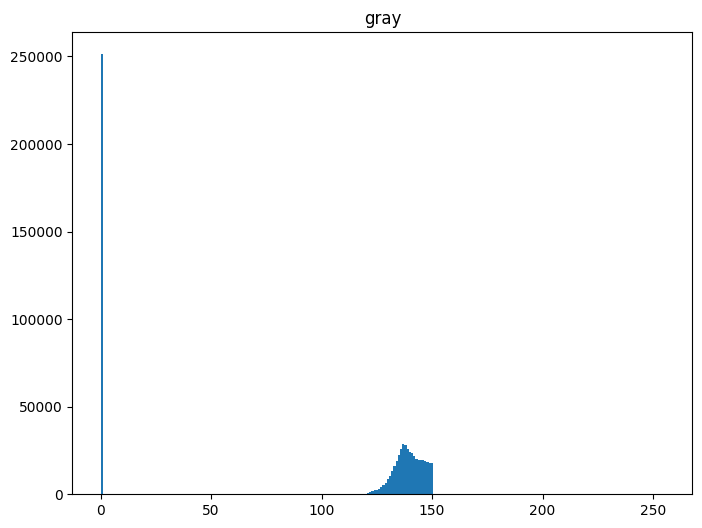

In [ ]:
# To be completed
# Display original image and result after
# binarization by extracting an intensity window at thresholds a and b
display(hawke_bay, 'gray')
display(binarize_with_intensity(hawke_bay, a, b), 'gray')

# Display the gray-scale histogram of the original image and the binarized image
# binarized image by extracting an intensity window at thresholds a and b
histogram(binarize_with_intensity(hawke_bay, a, b), 'gray')

## Ex 4 : Dynamic range expansion

Dynamic range expansion is a $t(f)$ transformation that modifies the dynamic range of gray levels in order to improve the visual appearance of the image. For two defined thresholds a and b, the transformation of a pixel f in the image is defined as follows:
\begin{equation*}
    t(f) =
    \begin{cases}
    0 & \quad \text{if } f<a\\
    255 & \quad \text{if } f>b\\
    255 \times \frac{f-a}{b-a} & \quad \text{otherwise}\\
    \end{cases}
\end{equation*}

Define your a and b thresholds and create a function that will perform the dynamic expansion on the loaded image. Display the original image, the image after dynamic expansion, and their corresponding histograms.

In [ ]:
# To be completed
# Definition of thresholds
a = 50
b = 150

In [ ]:
# To be completed
# Creation of the dynamic range expansion function
def binarize_dynamic(image, a, b):
  img_to_return = np.zeros_like(image, dtype=np.float32)
  # no need for this since the img_to_return is already zeros
  # img_to_return[image < a] = 0
  img_to_return[image > b] = 255
  otherwise_condition = (image >= a) & (image <= b)
  img_to_return[otherwise_condition] = 255 * (image[otherwise_condition] - a) / (b - a)
  return img_to_return.astype(np.uint8)

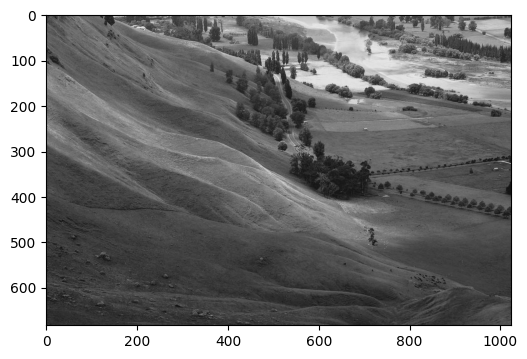

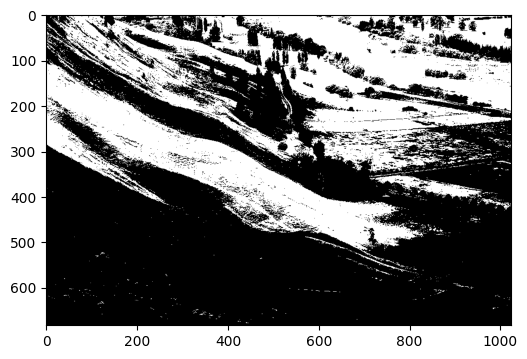

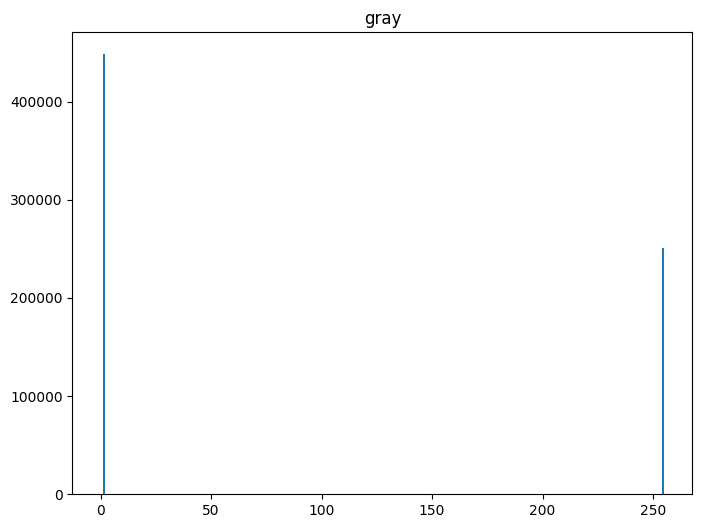

In [ ]:
# To be completed
# Display original image and result after
# dynamic expansion at thresholds a and b
display(hawke_bay, 'gray')
display(binarize_dynamic(hawke_bay, a, b), 'gray')

# Display gray-scale histogram of original and processed image
histogram(binarize_dynamic(hawke_bay, a, b), 'gray')

## Ex 5 : Contrast enhancement

Contrast enhancement is a transformation of the same type as dynamic range expansion, i.e. the modification of gray levels in order to improve the visual appearance of the image. For two defined thresholds a and b, the transformation of a pixel f in the image is defined as follows:
\begin{equation*}
    t(f) =
    \begin{cases}
    \frac{b}{a}f & \quad \text{if } 0 \leq f \leq a\\
    \frac{(255-b)f+255(b-a)}{255-a} & \quad \text{if } a \leq f \leq 255\\
    \end{cases}
\end{equation*}

Define your a and b thresholds and create a function to perform contrast enhancement on the loaded image. Display the original image, the image after dynamic range expansion, and their corresponding histograms.

In [ ]:
# To be completed
# Definition of thresholds
a = 50
b = 200

In [ ]:
# To be completed
# Create contrast enhancement function (with loops)
def contrast_enhancement(image, a, b):
  img_to_return = np.zeros_like(image, dtype=np.float32)
  # no need for this since the img_to_return is already zeros
  condition_1 = (image >= 0) & (image <= a)
  condition_2 = (image >= a) & (image <= 255)
  img_to_return[condition_1] = b / a * image[condition_1]
  img_to_return[condition_2] = ((255 - b) * image[condition_2] + 255 * (b - a)) / (255 - a)
  return img_to_return.astype(np.uint8)

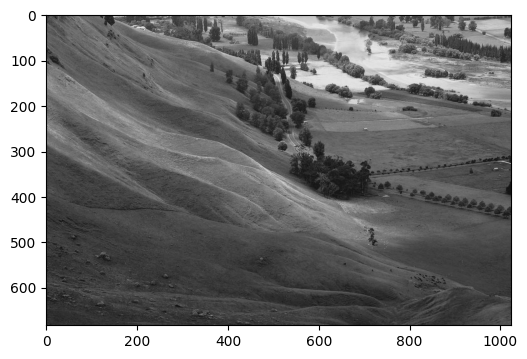

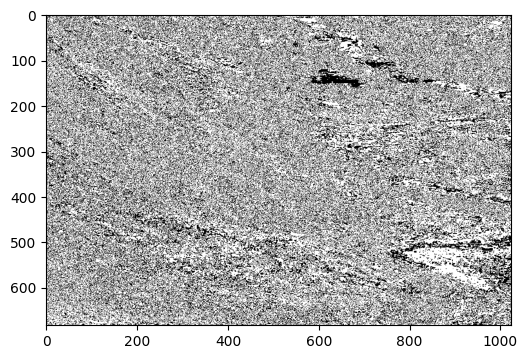

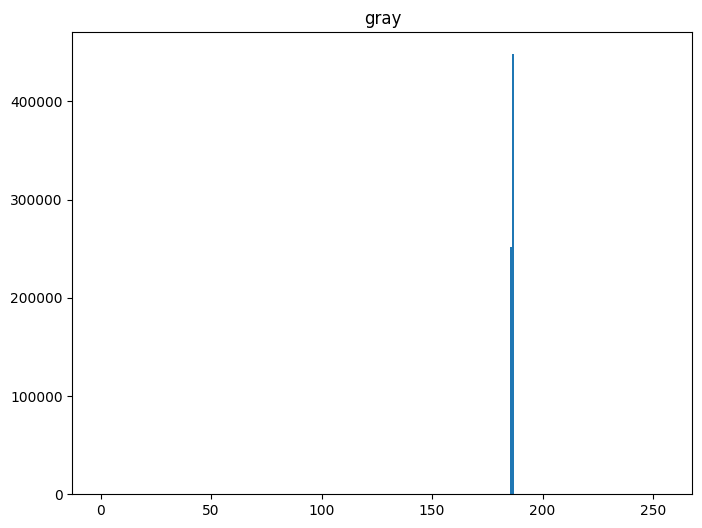

In [ ]:
# To be completed
# Display original image and result after
# contrast enhancement at thresholds a and b
display(hawke_bay, 'gray')
display(contrast_enhancement(hawke_bay, a, b), 'gray')

# Display gray-scale histogram of original and processed image
histogram(contrast_enhancement(hawke_bay, a, b), 'gray')

## Ex 6 : Histogram equalization

To finish this tutorial, we're going to implement one last algorithm: histogram equalization. As with the previous algorithms, histogram equalization is a *t(f)* transformation whose aim is to :
* make the histogram as flat as possible;
* distribute gray levels uniformly;
* maximize image entropy;
* obtain an image with maximum information.

From a discrete-domain point of view, the transformation is defined by :
\begin{equation*}
t(f) = \frac{L-1}{N} \sum_{i=0}^{f} h(i)
\end{equation*}
where L is the number of gray levels encoded in the image (the image is in uint8), N is the total number of pixels in the image, and h is the histogram of the image's gray levels.
So $\sum_{i=0}^{f} h(i)$ corresponds to the cumulative histogram at value f.

**1.**

Start by writing a function which, starting from the image, returns a vector corresponding to the cumulative histogram of its gray levels.

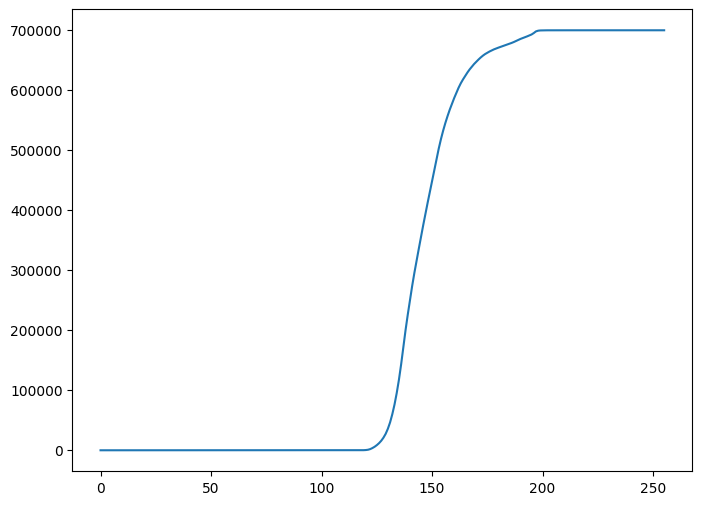

In [ ]:
# To be completed
def cumulative_hist(image):
  hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 255))
  return np.cumsum(hist)

hawke_bay_cum = cumulative_hist(hawke_bay)

plt.figure(figsize=(8, 6))
plt.plot(hawke_bay_cum)
plt.show()

---
**2.**

Now write the histogram equalization function for an image.

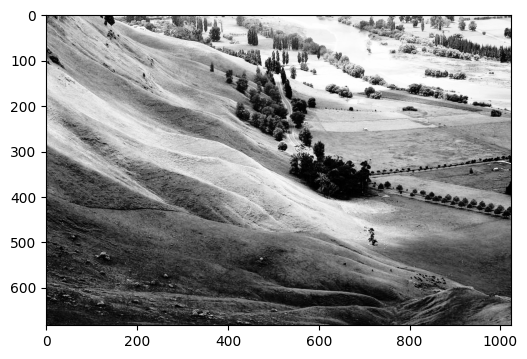

In [ ]:
# To be completed
# Writing the histogram agalization function for an image
def histogram_equalizator(image):
  flat_image = image.flatten()
  c_histogram = cumulative_hist(image)
  ch_norm = ((c_histogram - c_histogram.min()) * 255 / (c_histogram.max() - c_histogram.min())).astype(np.uint8)
  return ch_norm[flat_image].reshape(image.shape)

hawke_bay_hist_eq = histogram_equalizator(hawke_bay)

display(hawke_bay_hist_eq, 'gray')